## Outliers detection

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd
#Visualization
import plotly.express as px
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.subplots as sp
import plotly.graph_objs as go


In [5]:
df=pd.read_csv('imputedData_knn.csv')
df.shape

(18312, 27)

In [3]:
df.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,1.0,1.0,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,1.0,1.0,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,1.0,1.0,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,1.0,1.0,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,1.0,1.0,6.172597e+08


In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
numeric_df.head()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,169907.0,1.0,1.0,1.040235e+09
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,72011645.0,1079128.0,31003.0,1.0,1.0,3.100837e+08
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,8435055.0,282142.0,7399.0,1.0,1.0,6.306347e+07
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,211754952.0,1788577.0,55229.0,1.0,1.0,4.346636e+08
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,618480958.0,6197318.0,155930.0,1.0,1.0,6.172597e+08


In [7]:
from sklearn import preprocessing
scaled=preprocessing.scale(numeric_df)

from scipy.stats import zscore
scaled = numeric_df.apply(zscore)
scaled.head()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
0,1.211963,0.328665,0.197820,0.216677,0.772102,-0.978748,-0.277969,2.524418,0.982929,0.599202,0.007534,2.314785,3.335194,0.745265,0.653071,0.533988,3.841141
1,0.349971,0.319379,0.757203,0.404154,-0.594496,-0.706349,-0.286509,-0.876942,1.307473,-0.945355,-0.239697,-0.068689,0.270714,0.023002,0.653071,0.533988,0.754300
2,0.465308,1.340776,-1.200637,0.813177,-0.389692,-0.860341,-0.046314,-0.458599,0.086377,-0.430941,-0.074888,-0.312490,-0.204287,-0.099733,0.653071,0.533988,-0.290022
3,0.428885,0.486517,-0.920946,0.405239,-0.633595,-1.007690,2.355482,-0.770706,0.195910,-0.012442,0.131077,0.467194,0.693544,0.148970,0.653071,0.533988,1.280983
4,0.271056,0.277595,1.316586,-0.206017,0.716247,-0.919995,-0.290080,-0.735894,-0.019100,1.590528,1.309107,2.026893,3.321142,0.672589,0.653071,0.533988,2.052940


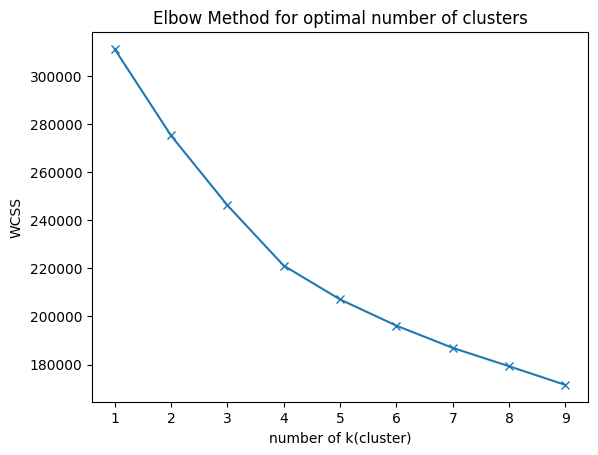

In [8]:
from sklearn.cluster import KMeans
wcss=[] #liste oluştur
cluster_range=range(1,10)
for k  in cluster_range:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(cluster_range,wcss,marker='x')
plt.xlabel("number of k(cluster)")
plt.ylabel("WCSS")
plt.title("Elbow Method for optimal number of clusters")
plt.show()

In [9]:
clusters_df = pd.DataFrame({'clusters':cluster_range,
                            'inertia': wcss})
clusters_df

,clusters,inertia
0,1,311304.000000
1,2,275307.911579
2,3,246312.268819
3,4,221153.134706
4,5,207087.491215
5,6,196173.700853
6,7,186916.190794
7,8,179279.211055
8,9,171517.738520


In [10]:
kmeans=KMeans(n_clusters = 3)
kmeans.fit(scaled)

KMeans(n_clusters=3)

In [11]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.19088359,  0.3302159 ,  0.01755251,  0.29247375,  0.09259773,
        -0.31002426, -0.17954021,  0.05232086,  0.20168704,  0.06977578,
        -0.00443031, -0.11069641, -0.11583248, -0.06170266,  0.05006517,
         0.06535435, -0.09993744],
       [-0.8868921 , -1.46307696, -0.07429392, -1.34172773, -0.39592647,
         1.40388883,  0.82460475, -0.20734562, -0.86818766, -0.29794382,
         0.01393217, -0.23748452, -0.24388284, -0.1024016 , -0.31940875,
        -0.37449802, -0.21354213],
       [ 0.32544866,  0.18822757, -0.00829166,  0.40822326, -0.02273072,
        -0.3361019 , -0.25565632, -0.09900638, -0.01886663, -0.01924096,
         0.02746765,  3.76927635,  3.91983731,  1.94321176,  0.54229818,
         0.4844045 ,  3.39839715]])

In [12]:
centroid_df = pd.DataFrame(centroids,columns = list(numeric_df.columns))
centroid_df

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
0,0.190884,0.330216,0.017553,0.292474,0.092598,-0.310024,-0.179540,0.052321,0.201687,0.069776,-0.004430,-0.110696,-0.115832,-0.061703,0.050065,0.065354,-0.099937
1,-0.886892,-1.463077,-0.074294,-1.341728,-0.395926,1.403889,0.824605,-0.207346,-0.868188,-0.297944,0.013932,-0.237485,-0.243883,-0.102402,-0.319409,-0.374498,-0.213542
2,0.325449,0.188228,-0.008292,0.408223,-0.022731,-0.336102,-0.255656,-0.099006,-0.018867,-0.019241,0.027468,3.769276,3.919837,1.943212,0.542298,0.484405,3.398397


In [15]:
clusters=scaled.copy()
clusters['cluster_pred']=kmeans.fit_predict(scaled)
scaled["labels"]=clusters['cluster_pred']
scaled.head()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream,labels
0,1.211963,0.328665,0.197820,0.216677,0.772102,-0.978748,-0.277969,2.524418,0.982929,0.599202,0.007534,2.314785,3.335194,0.745265,0.653071,0.533988,3.841141,0
1,0.349971,0.319379,0.757203,0.404154,-0.594496,-0.706349,-0.286509,-0.876942,1.307473,-0.945355,-0.239697,-0.068689,0.270714,0.023002,0.653071,0.533988,0.754300,1
2,0.465308,1.340776,-1.200637,0.813177,-0.389692,-0.860341,-0.046314,-0.458599,0.086377,-0.430941,-0.074888,-0.312490,-0.204287,-0.099733,0.653071,0.533988,-0.290022,1
3,0.428885,0.486517,-0.920946,0.405239,-0.633595,-1.007690,2.355482,-0.770706,0.195910,-0.012442,0.131077,0.467194,0.693544,0.148970,0.653071,0.533988,1.280983,1
4,0.271056,0.277595,1.316586,-0.206017,0.716247,-0.919995,-0.290080,-0.735894,-0.019100,1.590528,1.309107,2.026893,3.321142,0.672589,0.653071,0.533988,2.052940,0


### Univariate Outliers detection

In [17]:
def univariateOutliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    small_outliers = df[column] < (Q1 - 1.5 * IQR)
    big_outliers = df[column] > (Q3 + 1.5 * IQR)
    return [small_outliers,big_outliers]

In [18]:
def distributionCompare(df,column):
    small_outliers,big_outliers=univariateOutliers(df,column)
    fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(5,3))
    df.boxplot(column=column,ax=axes[0]);
    df.hist(column=column, ax=axes[1]);
    fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(5,3))
    df[~(small_outliers | big_outliers)].boxplot(column=column,ax=axes[0]);
    df[~(small_outliers | big_outliers)].hist(column=column, ax=axes[1]);

#### Are there outliers on the target variable?

It’s best to remove outliers only when you have a sound reason for doing so.

Some outliers represent natural variations in the population, and they should be left as is in your dataset. These are called true outliers.

Other outliers are problematic and should be removed because they represent measurement errors, data entry or processing errors, or poor sampling.

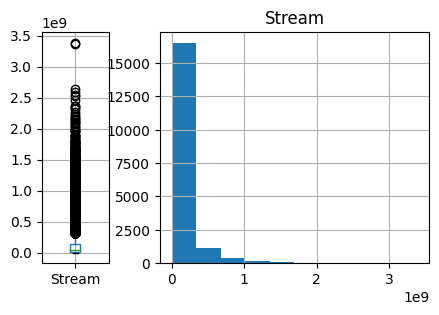

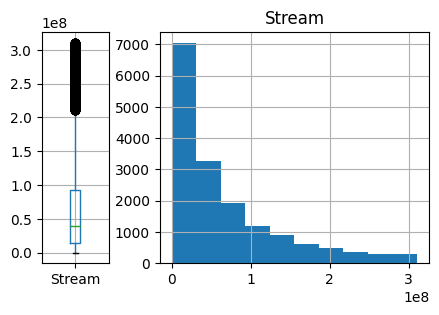

In [21]:
distributionCompare(df,'Stream')

### Local Outlier Factor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error

https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

In [8]:
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(numeric_df)
# select all rows that are not outliers
mask = (yhat != -1)
df_withoutOutliers = df.loc[mask, :]

mask = (yhat == -1)
df_outliers = df.loc[mask, :]


In [ ]:
df_outliers.shape

(52, 27)

In [ ]:
df_withoutOutliers.shape

(18260, 27)

In [ ]:
df_outliers.to_csv("outliers.csv", encoding='utf-8', index=False)
df_withoutOutliers.to_csv("df_withoutOutliers.csv", encoding='utf-8', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c6bca811-fc7a-456b-b8f3-4c66c733d95a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>